<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter07/Understanding_selectivesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp36-none-any.whl size=4360 sha256=0d107dc79e5c36d16e20d361d22fce18158f2d89d3ce7ccb4195f3d2d7e3158b
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch
     |████████████████████████████████| 36.7MB 104kB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=a05d6f66b125ce9542440109ced0893eec96da52d937afe2db86ba0e661f70e5
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars


In [ ]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2020-10-24 08:25:46--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2020-10-24 08:25:46--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d69eae7a6aed424a0828d2682.dl.dropboxusercontent.com/cd/0/inline/BB0R7XgJuHP_rw30mdml1H6RgH6_YWFiz9pdrFkeziOr_m1Zq_tddy_OJQZwhrvJ0-pJfSA4bfWBmdWNiQIv_z0s_PuB-KMCf3_h7UtnmebejA/file# [following]
--2020-10-24 08:25:47--  https://uc7d69eae7a6aed424a0828d2682.dl.dropboxusercontent.com/cd/0/inline/BB0R7XgJuHP_rw30mdml1H6RgH6_YWFiz9pdrFkeziOr_m1Zq_tddy_OJQZwhrvJ0-pJfSA4bfWBmdWNiQIv_z0s_PuB-KMCf3_h7UtnmebejA/file
Resolving uc7d69

In [ ]:
segments_fz = felzenszwalb(img, scale=200)

2020-10-24 08:25:48.022 | INFO     | torch_snippets.loader:subplots:359 - plotting 2 images in a grid of 1x2 @ (10, 10)


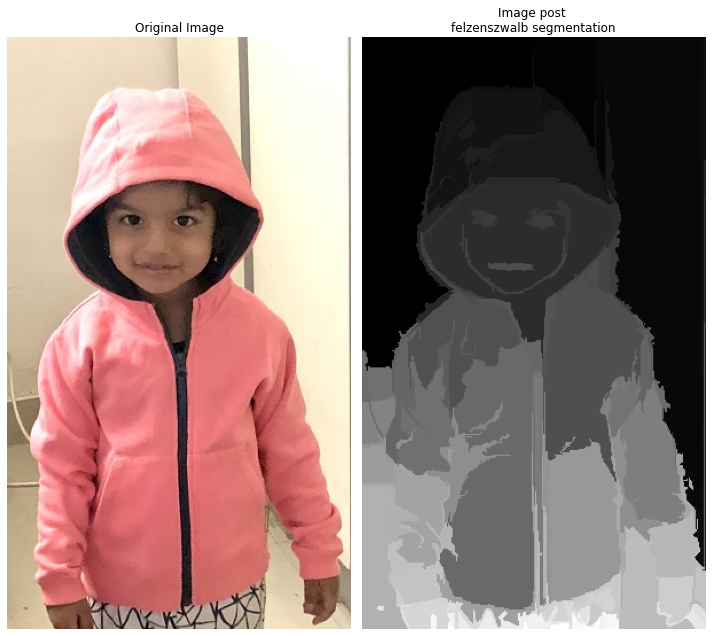

In [ ]:
subplots([img, segments_fz], titles=['Original Image','Image post \nfelzenszwalb segmentation'], figsize=(10,10), nc=2)

In [ ]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates


In [ ]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

--2020-10-24 08:27:57--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2020-10-24 08:27:57--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d69eae7a6aed424a0828d2682.dl.dropboxusercontent.com/cd/0/inline/BB0R7XgJuHP_rw30mdml1H6RgH6_YWFiz9pdrFkeziOr_m1Zq_tddy_OJQZwhrvJ0-pJfSA4bfWBmdWNiQIv_z0s_PuB-KMCf3_h7UtnmebejA/file# [following]
--2020-10-24 08:27:57--  https://uc7d69eae7a6aed424a0828d2682.dl.dropboxusercontent.com/cd/0/inline/BB0R7XgJuHP_rw30mdml1H6RgH6_YWFiz9pdrFkeziOr_m1Zq_tddy_OJQZwhrvJ0-pJfSA4bfWBmdWNiQIv_z0s_PuB-KMCf3_h7UtnmebejA/file
Resolving uc7d69

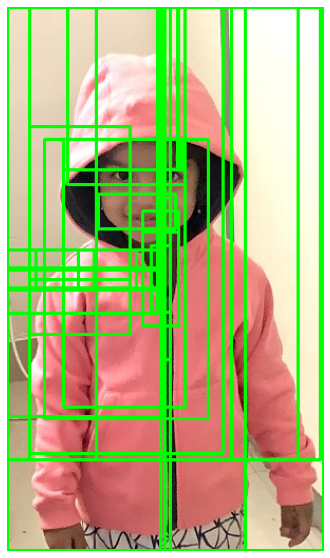

In [ ]:
candidates = extract_candidates(img)
show(img, bbs = candidates)